In [1]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath('../..'))

from offshore_wind_nj.config import INTERIM_DATA_DIR
import matplotlib.pyplot as plt

2024-11-10 13:14:11.525 | INFO     | offshore_wind_nj.config:<module>:11 - PROJ_ROOT path is: /nfs/storage1/home/noriegac/Documents/Offshore_Wind_Research


In [2]:
df_path = os.path.join(INTERIM_DATA_DIR,"df.pkl")

import pickle

# Open the .pkl file in binary read mode
with open(df_path, 'rb') as file:
    df = pickle.load(file)

In [3]:
df = df.reset_index()
df = df.sort_values(by='Date')

In [4]:
cluster_dfs = {}  # Create an empty dictionary to store DataFrames

for cluster in df['Cluster'].unique():
    cluster_dfs[cluster] = df[df['Cluster'] == cluster]


In [5]:
cluster_dfs.keys()

dict_keys([2, 1, 4, 3, 0])

In [6]:
df_cluster_0 = cluster_dfs[0]
df_cluster_1 = cluster_dfs[1]
df_cluster_2 = cluster_dfs[2]
df_cluster_3 = cluster_dfs[3]
df_cluster_4 = cluster_dfs[4]



In [21]:
len(df_cluster_0.index.unique())

762

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def plot_wind_speed_distribution(df, title='Wind Speed Distribution by Direction', speed_ranges=None, num_bins=36):
    """
    Plots a wind speed distribution by direction for a specific cluster of data.
    
    Parameters:
    - df: DataFrame containing 'Direction' and 'Speed' columns for the specific cluster
    - title: Title of the plot (default: 'Wind Speed Distribution by Direction')
    - speed_ranges: List of tuples specifying the speed ranges (default: [(0, 6), (6, 10), (10, 20), (20, np.inf)])
    - num_bins: Number of bins for the wind direction (default: 36)
    """
    
    # Default speed ranges if not provided
    if speed_ranges is None:
        speed_ranges = [(0, 6), (6, 10), (10, 20), (20, np.inf)]
    
    # Extract wind direction and speed
    valid_directions = df['Direction']
    valid_speeds = df['Speed']
    
    # Calculate bin edges and indices for directions
    bin_edges = np.linspace(0, 360, num_bins + 1)
    bin_indices = np.digitize(valid_directions, bins=bin_edges) - 1
    
    # Initialize an array to store counts for each speed range in each direction bin
    range_counts = np.zeros((num_bins, len(speed_ranges)))
    
    # Count occurrences in each speed range for each direction bin
    for i in range(num_bins):
        bin_mask = bin_indices == i
        speeds_in_bin = valid_speeds[bin_mask]
        
        for j, (low, high) in enumerate(speed_ranges):
            range_counts[i, j] = np.sum((speeds_in_bin >= low) & (speeds_in_bin < high))
    
    # Convert bin edges to angles
    angles = np.deg2rad(bin_edges[:-1])
    width = np.deg2rad(360 / num_bins)
    
    # Plotting
    plt.figure(figsize=(10, 8))
    ax = plt.subplot(111, polar=True)
    
    # Set azimuth angle so North (0°) is at the top
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)  # Set clockwise direction
    
    # Colors for each speed range
    colors = ['#5bc0de', '#f0ad4e', '#5cb85c', '#d9534f']
    
    # Plot stacked bars for each speed range
    bottom = np.zeros(num_bins)
    for j in range(len(speed_ranges)):
        bars = ax.bar(angles, range_counts[:, j], width=width, bottom=bottom,
                      color=colors[j], alpha=0.7)
        bottom += range_counts[:, j]  # Stack the bars by updating the bottom position
    
    # Remove radial ticks and labels
    ax.set_yticklabels([])
    
    # Add labels and title
    ax.set_title(title, va='bottom')
    ax.set_xticks(np.deg2rad(np.arange(0, 360, 45)))  # Set ticks for N, NE, E, SE, S, SW, W, NW
    ax.set_xticklabels(['N', 'NE', 'E', 'SE', 'S', 'SW', 'W', 'NW'])
    
    # Custom legend to indicate speed ranges
    ax.legend([plt.Line2D([0], [0], color=color, lw=4) for color in colors],
              [f"{low}-{high} m/s" if high != np.inf else f">{low} m/s" 
               for low, high in speed_ranges],
              loc='upper right', bbox_to_anchor=(1.2, 1.1))  # Place legend outside the plot
    
    plt.show()


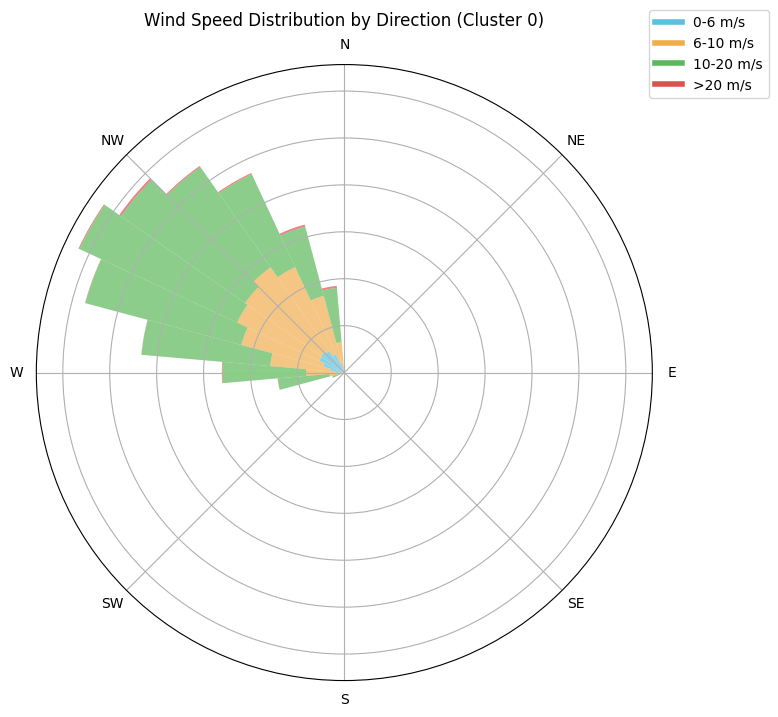

In [29]:
plot_wind_speed_distribution(df_cluster_0, title='Wind Speed Distribution by Direction (Cluster 0)')

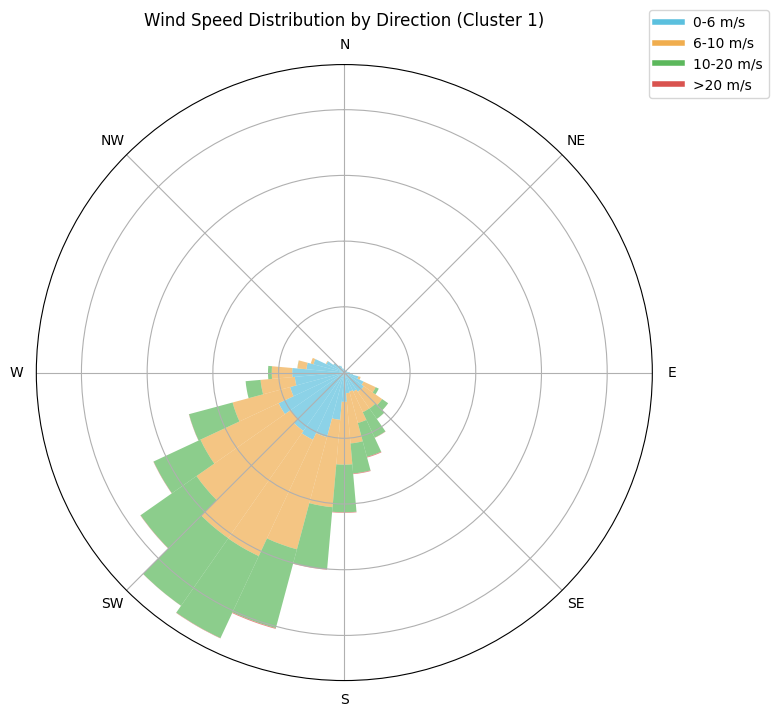

In [30]:
plot_wind_speed_distribution(df_cluster_1, title='Wind Speed Distribution by Direction (Cluster 1)')

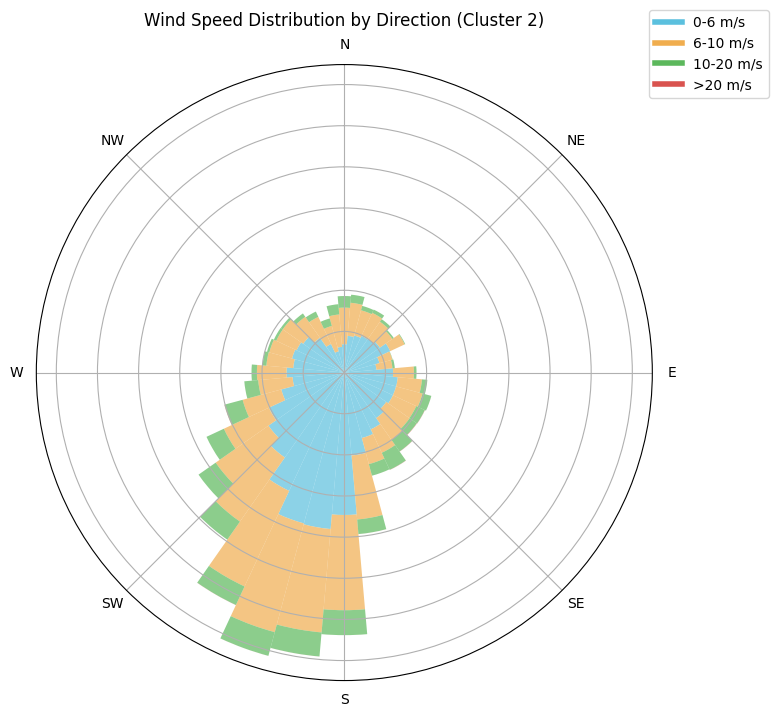

In [31]:
plot_wind_speed_distribution(df_cluster_2, title='Wind Speed Distribution by Direction (Cluster 2)')

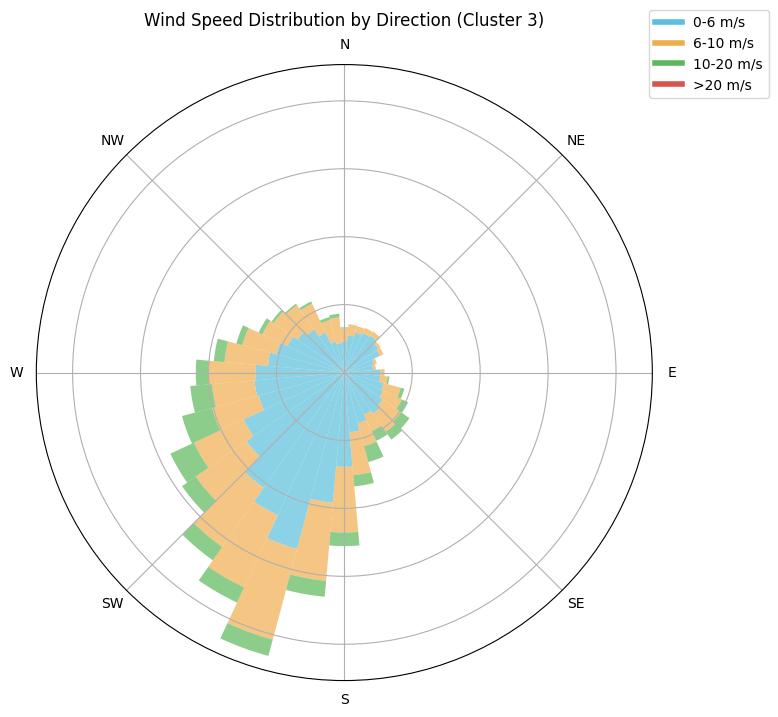

In [32]:
plot_wind_speed_distribution(df_cluster_3, title='Wind Speed Distribution by Direction (Cluster 3)')

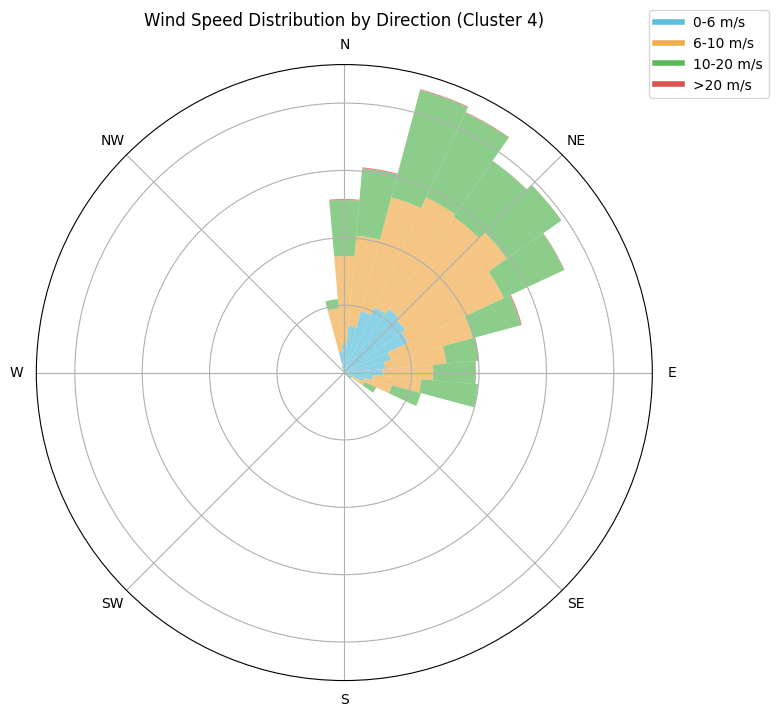

In [33]:
plot_wind_speed_distribution(df_cluster_4, title='Wind Speed Distribution by Direction (Cluster 4)')

In [43]:
df_cluster_0[df_cluster_0[['Lat','Lon']].duplicated(keep=False)]

Speed   Direction  Cos(dir)  Sen(dir)        Lat        Lon  \
Date                                                                          
2015-12-02  10.469345  280.901184  0.189116 -0.981955  41.044518 -69.544739   
2015-12-02  10.576753  283.378815  0.231388 -0.972862  41.112480 -69.563713   
2015-12-02  10.848209  283.386475  0.231518 -0.972831  41.119785 -69.549713   
2015-12-02  10.905793  288.386475  0.315425 -0.948951  41.236595 -69.519798   
2015-12-02   9.941738  290.801514  0.355132 -0.934816  41.264046 -69.646439   
...               ...         ...       ...       ...        ...        ...   
2021-01-10   9.100000  324.878906  0.817938 -0.575306  36.756115 -70.689445   
2021-01-10  11.000000  312.810913  0.679581 -0.733600  36.331604 -70.903915   
2021-08-02   7.200000  307.452087  0.608098 -0.793862  38.891815 -72.549644   
2021-08-02   7.100000  309.353882  0.634108 -0.773244  38.419468 -71.173698   
2018-10-29  14.168657  279.412354  0.163539 -0.986537  35.919613 -73.484970   

                                                           ID Start Time  \
Date                                                                       
2015-12-02  S1A_IW_OCN__2SDV_20151202T104909_20151202T1049...   10:49:09   
2015-12-02  S1A_IW_OCN__2SDV_20151202T104909_20151202T1049...   10:49:09   
2015-12-02  S1A_IW_OCN__2SDV_20151202T104909_20151202T1049...   10:49:09   
2015-12-02  S1A_IW_OCN__2SDV_20151202T104909_20151202T1049...   10:49:09   
2015-12-02  S1A_IW_OCN__2SDV_20151202T104909_20151202T1049...   10:49:09   
...                                                       ...        ...   
2021-01-10  S1B_IW_OCN__2SDV_20210110T104947_20210110T1050...   10:49:47   
2021-01-10  S1B_IW_OCN__2SDV_20210110T104947_20210110T1050...   10:49:47   
2021-08-02  S1B_IW_OCN__2SDV_20210802T104928_20210802T1049...   10:49:28   
2021-08-02  S1B_IW_OCN__2SDV_20210802T104928_20210802T1049...   10:49:28   
2018-10-29  S1B_IW_OCN__2SDV_20181029T105002_20181029T1050...   10:50:02   

            End Time  U-East-West  V-North-South              x  \
Date                                                              
2015-12-02  10:49:34   -10.280424       1.979916  153169.697846   
2015-12-02  10:49:34   -10.289716       2.447335  151429.101873   
2015-12-02  10:49:34   -10.553470       2.511556  152586.028633   
2015-12-02  10:49:34   -10.349059       3.439957  154829.795495   
2015-12-02  10:49:34    -9.293699       3.530624  144179.897489   
...              ...          ...            ...            ...   
2021-01-10  10:50:23    -5.235289       7.443236   60693.660758   
2021-01-10  10:50:23    -8.069605       7.475391   41826.388223   
2021-08-02  10:49:53    -5.715807       4.378304 -101982.104843   
2021-08-02  10:49:53    -5.490034       4.502169   17152.311943   
2018-10-29  10:50:27   -13.977903       2.317124 -190502.038664   

                        y  Speed_rolling  Cluster  
Date                                               
2015-12-02  244076.697531      10.641360        0  
2015-12-02  251574.491244      11.000577        0  
2015-12-02  252407.166379      11.149237        0  
2015-12-02  265399.784566      11.037225        0  
2015-12-02  268233.949688      10.194052        0  
...                   ...            ...      ...  
2021-01-10 -232014.785355      11.320000        0  
2021-01-10 -279143.068066       9.080000        0  
2021-08-02    4825.128630       7.110000        0  
2021-08-02  -48096.826633       6.580000        0  
2018-10-29 -322676.399002      14.459403        0  

[15674 rows x 15 columns]

In [63]:
df_cluster_0[df_cluster_0.index.year <2016]

Speed   Direction  Cos(dir)  Sen(dir)        Lat        Lon  \
Date                                                                          
2015-08-15  24.040342  249.998535 -0.342044 -0.939684  40.586525 -73.617691   
2015-08-16  11.691143  282.072174  0.209144 -0.977885  41.209934 -71.601265   
2015-08-16  11.248486  296.311371  0.443249 -0.896399  41.261055 -72.013237   
2015-08-16  14.263627  288.866364  0.323362 -0.946275  41.262489 -72.025017   
2015-08-16  14.252797  290.932159  0.357262 -0.934004  41.263927 -72.036797   
...               ...         ...       ...       ...        ...        ...   
2015-12-26  10.707667  312.833038  0.679864 -0.733338  42.362106 -70.981911   
2015-12-26  11.893542  297.319244  0.458948 -0.888463  42.417400 -70.907349   
2015-12-26  11.888127  301.102997  0.516578 -0.856240  42.418922 -70.919327   
2015-12-26  11.622201  303.904846  0.557815 -0.829965  42.420444 -70.931305   
2015-12-26  15.489740  292.311035  0.379634 -0.925137  42.427906 -70.917221   

                                                           ID Start Time  \
Date                                                                       
2015-08-15  S1A_IW_OCN__2SDV_20150815T225027_20150815T2250...   22:50:27   
2015-08-16  S1A_IW_OCN__2SDV_20150816T104849_20150816T1049...   10:48:49   
2015-08-16  S1A_IW_OCN__2SDV_20150816T104849_20150816T1049...   10:48:49   
2015-08-16  S1A_IW_OCN__2SDV_20150816T104849_20150816T1049...   10:48:49   
2015-08-16  S1A_IW_OCN__2SDV_20150816T104849_20150816T1049...   10:48:49   
...                                                       ...        ...   
2015-12-26  S1A_IW_OCN__2SDV_20151226T104843_20151226T1049...   10:48:43   
2015-12-26  S1A_IW_OCN__2SDV_20151226T104843_20151226T1049...   10:48:43   
2015-12-26  S1A_IW_OCN__2SDV_20151226T104843_20151226T1049...   10:48:43   
2015-12-26  S1A_IW_OCN__2SDV_20151226T104843_20151226T1049...   10:48:43   
2015-12-26  S1A_IW_OCN__2SDV_20151226T104843_20151226T1049...   10:48:43   

            End Time  U-East-West  V-North-South              x  \
Date                                                              
2015-08-15  22:50:55   -22.590322      -8.222861 -189734.659306   
2015-08-16  10:49:14   -11.432592       2.445128  -19297.835078   
2015-08-16  10:49:14   -10.083126       4.985880  -53735.504725   
2015-08-16  10:49:14   -13.497320       4.612310  -54719.460077   
2015-08-16  10:49:14   -13.312171       5.091986  -55703.370384   
...              ...          ...            ...            ...   
2015-12-26  10:49:08    -7.852338       7.279761   31991.500490   
2015-12-26  10:49:08   -10.566973       5.458519   38095.977654   
2015-12-26  10:49:08   -10.179092       6.141145   37110.279908   
2015-12-26  10:49:08    -9.646022       6.483041   36124.625868   
2015-12-26  10:49:08   -14.330126       5.880436   37278.456584   

                        y  Speed_rolling  Cluster  
Date                                               
2015-08-15  194140.785098      11.976234        0  
2015-08-16  260899.013900       3.701092        0  
2015-08-16  266729.324571       3.769382        0  
2015-08-16  266895.285273       4.978907        0  
2015-08-16  267061.795832       6.190077        0  
...                   ...            ...      ...  
2015-12-26  388704.049912       7.022906        0  
2015-12-26  394868.238737       5.770184        0  
2015-12-26  395032.199576       6.421060        0  
2015-12-26  395196.290254       7.064300        0  
2015-12-26  396029.940839       6.388265        0  

[91955 rows x 15 columns]

In [ ]:
add_heatmap(df_cluster_0, map_obj=wind_map)

In [11]:
df_cluster_0['Speed'].values

array([17.6, 12.4,  8.4, ..., 16.1, 16.4, 17.7], dtype=float32)

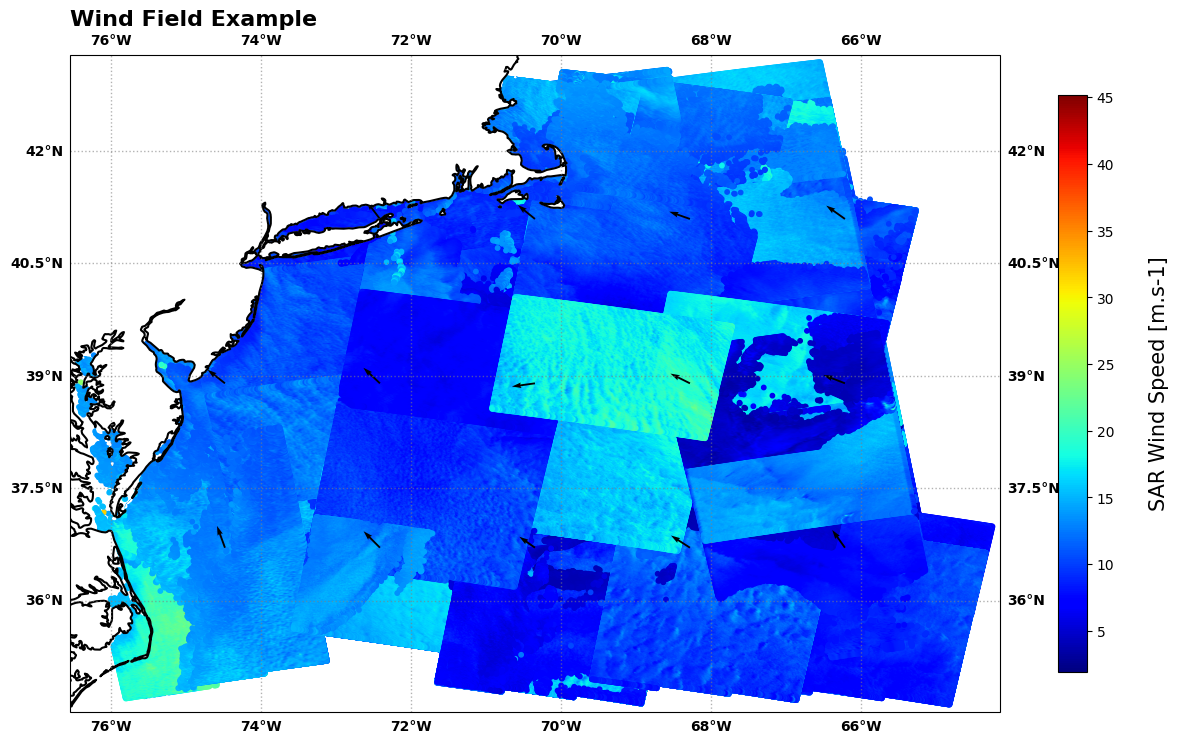

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

def plot_wind_field(speed, direction, lat, lon, title="Sentinel-1 Ocean Wind Field (OWI)", quiver_density=10):
    """
    Plots wind field based on provided speed, direction, latitude, and longitude.
    
    :param speed: List or array of wind speeds (m/s)
    :param direction: List or array of wind directions (degrees)
    :param lat: List or array of latitudes (degrees)
    :param lon: List or array of longitudes (degrees)
    :param title: Title for the plot
    :param quiver_density: Density of the quiver grid
    """

    # Create the figure and axis
    fig = plt.figure(figsize=(15, 15))
    ax = plt.axes(projection=ccrs.PlateCarree())

    # Draw Wind Speed Data (contour plot)
    carto_map = ax.scatter(lon, lat, c=speed, cmap='jet', s=10, transform=ccrs.PlateCarree())

    # Title and Labels
    ax.set_title(title, fontsize=16, fontweight='bold', loc='left')

    # Set extent with margin
    lon_margin, lat_margin = 0.1, 0.1
    ax.set_xlim(np.amin(lon) - lon_margin, np.amax(lon) + lon_margin)
    ax.set_ylim(np.amin(lat) - lat_margin, np.amax(lat) + lat_margin)

    # Mask land regions and add coastlines
    land = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face', facecolor='w')
    ax.add_feature(land)
    ax.coastlines(resolution='10m', linewidth=1.5, color='black')

    # Colorbar
    cbar = plt.colorbar(carto_map, ax=ax, shrink=0.5, pad=0.05)
    cbar.set_label('SAR Wind Speed [m.s-1]', fontsize=15, labelpad=25)

    # Calculate and draw wind vectors (using quiver)
    dx = np.sin(np.radians(direction))
    dy = np.cos(np.radians(direction))
    ax.quiver(lon, lat, dx, dy, angles='xy', color='black', scale=40, width=0.002, regrid_shape=quiver_density)

    # Draw gridlines and set label formatting
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.6, linestyle=':')
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}
    gl.ylabel_style = {'color': 'black', 'weight': 'bold', 'size': 10}

    # Show or save the plot
    plt.show()

# Example usage:
# Lists of wind speed, direction, latitude, and longitude
speed = df_cluster_0['Speed'].values  # Example wind speeds (in m/s)
direction = df_cluster_0['Direction'].values  # Example wind directions (in degrees)
lat = df_cluster_0['Lat'].values  # Example latitudes
lon = df_cluster_0['Lon'].values  # Example longitudes

# Call the function to plot the wind field
plot_wind_field(speed, direction, lat, lon, title="Wind Field Example", quiver_density=40)


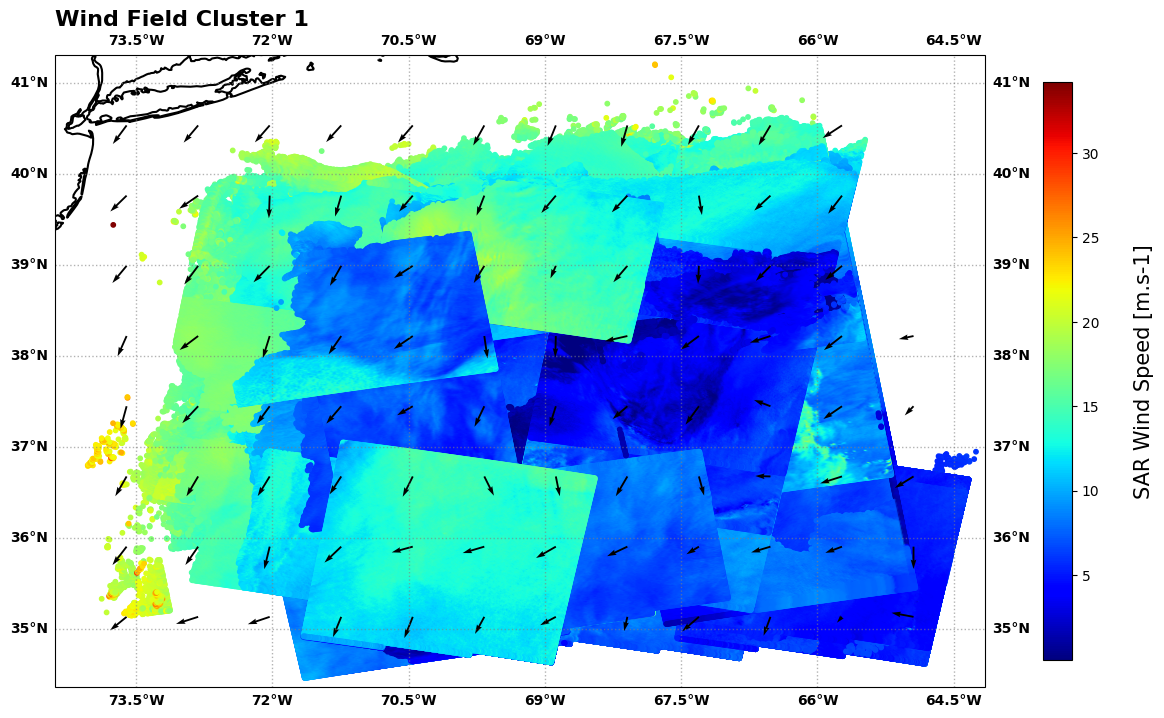

In [8]:
# Lists of wind speed, direction, latitude, and longitude
speed = df_cluster_1['Speed'].values  # Example wind speeds (in m/s)
direction = df_cluster_1['Direction'].values  # Example wind directions (in degrees)
lat = df_cluster_1['Lat'].values  # Example latitudes
lon = df_cluster_1['Lon'].values  # Example longitudes

# Call the function to plot the wind field
plot_wind_field(speed, direction, lat, lon, title="Wind Field Cluster 1", quiver_density=10)

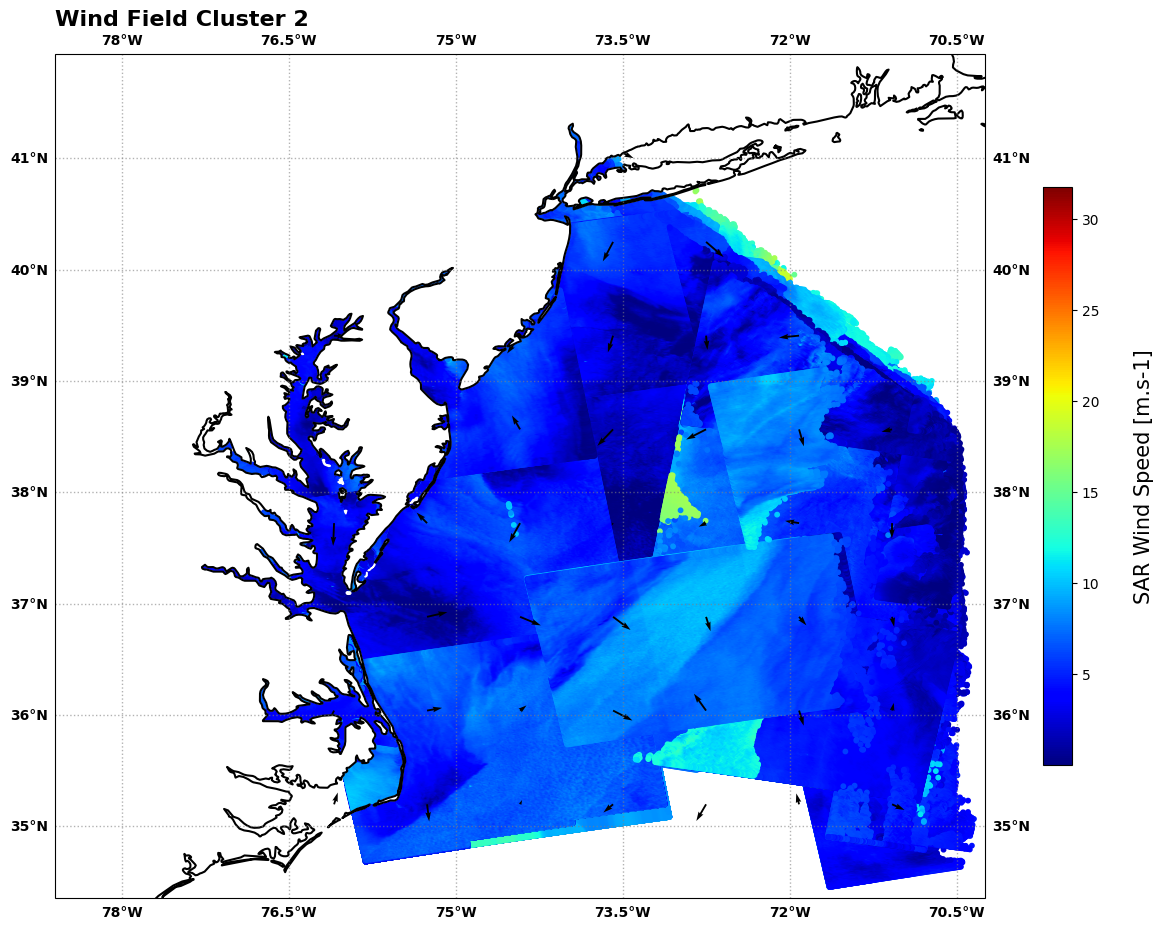

In [12]:
# Lists of wind speed, direction, latitude, and longitude
speed = df_cluster_2['Speed'].values  # Example wind speeds (in m/s)
direction = df_cluster_2['Direction'].values  # Example wind directions (in degrees)
lat = df_cluster_2['Lat'].values  # Example latitudes
lon = df_cluster_2['Lon'].values  # Example longitudes

# Call the function to plot the wind field
plot_wind_field(speed, direction, lat, lon, title="Wind Field Cluster 2", quiver_density=10)

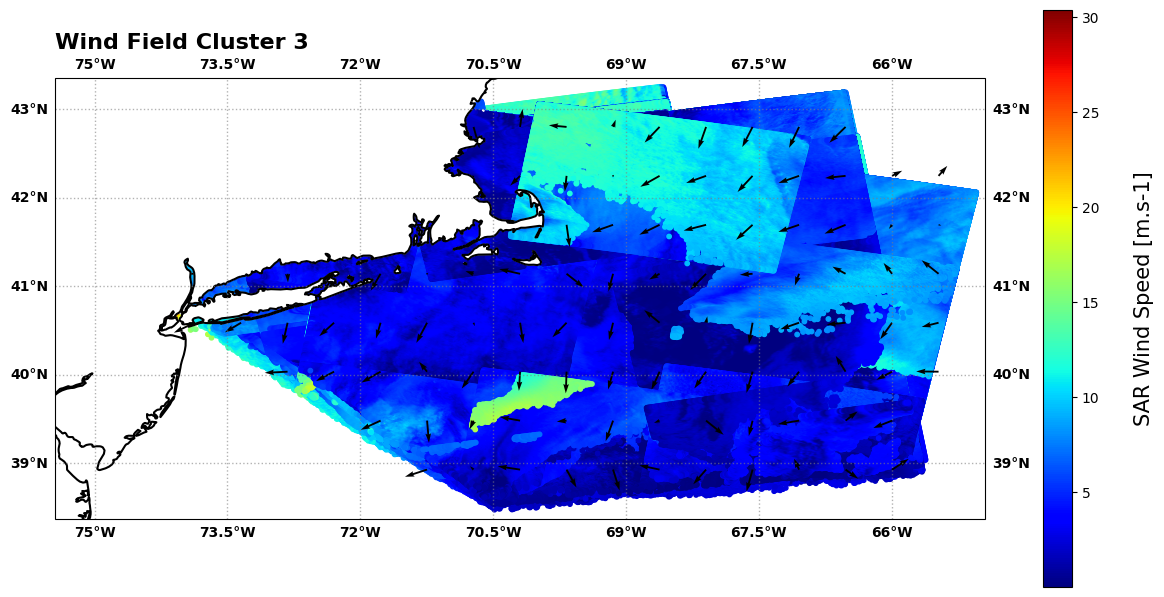

In [13]:
# Lists of wind speed, direction, latitude, and longitude
speed = df_cluster_3['Speed'].values  # Example wind speeds (in m/s)
direction = df_cluster_3['Direction'].values  # Example wind directions (in degrees)
lat = df_cluster_3['Lat'].values  # Example latitudes
lon = df_cluster_3['Lon'].values  # Example longitudes

# Call the function to plot the wind field
plot_wind_field(speed, direction, lat, lon, title="Wind Field Cluster 3", quiver_density=10)

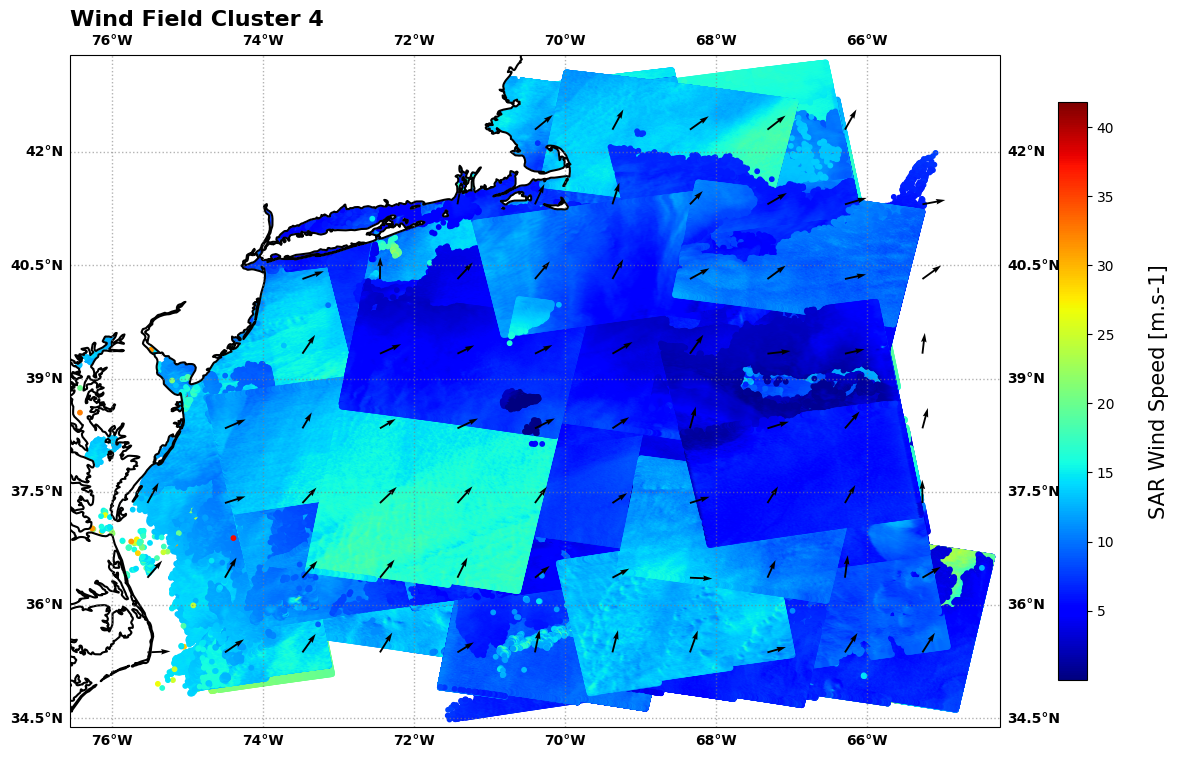

In [14]:
# Lists of wind speed, direction, latitude, and longitude
speed = df_cluster_4['Speed'].values  # Example wind speeds (in m/s)
direction = df_cluster_4['Direction'].values  # Example wind directions (in degrees)
lat = df_cluster_4['Lat'].values  # Example latitudes
lon = df_cluster_4['Lon'].values  # Example longitudes

# Call the function to plot the wind field
plot_wind_field(speed, direction, lat, lon, title="Wind Field Cluster 4", quiver_density=10)

In [18]:
df

Date      Speed   Direction  Cos(dir)  Sen(dir)        Lat  \
0         2019-04-20   9.112082  191.507050 -0.979900 -0.199488  35.735710   
1         2019-04-20   8.611857  191.513458 -0.979878 -0.199598  35.737404   
2         2019-04-20   8.684312  191.519867 -0.979855 -0.199708  35.739094   
3         2019-04-20   8.623184  191.526260 -0.979833 -0.199817  35.740788   
4         2019-04-20   8.722241  191.532669 -0.979811 -0.199927  35.742477   
...              ...        ...         ...       ...       ...        ...   
223109361 2021-01-29  16.900000  321.281860  0.780232 -0.625490  38.554832   
223109362 2021-01-29  16.299999  324.274872  0.811827 -0.583897  38.556259   
223109363 2021-01-29  16.100000  323.267883  0.801440 -0.598074  38.557686   
223109364 2021-01-29  16.400000  322.260895  0.790806 -0.612067  38.559109   
223109365 2021-01-29  17.700001  320.253906  0.768885 -0.639387  38.560532   

                 Lon                                                 ID  \
0         -74.001427  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   
1         -73.990570  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   
2         -73.979713  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   
3         -73.968857  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   
4         -73.957993  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   
...              ...                                                ...   
223109361 -70.874741  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   
223109362 -70.886063  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   
223109363 -70.897392  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   
223109364 -70.908722  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   
223109365 -70.920052  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   

          Start Time  End Time  U-East-West  V-North-South              x  \
0           22:49:49  22:50:14    -1.817755      -8.928930 -237611.571366   
1           22:49:49  22:50:14    -1.718909      -8.438569 -236625.873432   
2           22:49:49  22:50:14    -1.734324      -8.509371 -235640.228878   
3           22:49:49  22:50:14    -1.723060      -8.449283 -234654.613501   
4           22:49:49  22:50:14    -1.743809      -8.546147 -233668.362582   
...              ...       ...          ...            ...            ...   
223109361   10:41:09  10:41:34   -10.570777      13.185926   43102.933383   
223109362   10:41:09  10:41:34    -9.517527      13.232787   42118.083871   
223109363   10:41:09  10:41:34    -9.629000      12.903192   41132.609846   
223109364   10:41:09  10:41:34   -10.037897      12.969217   40147.176541   
223109365   10:41:09  10:41:34   -11.317142      13.609273   39161.781729   

                       y  Speed_rolling  Cluster  
0         -341831.927671       9.112082        2  
1         -341672.564783       8.861969        2  
2         -341513.506687       8.802750        2  
3         -341353.908445       8.757859        2  
4         -341194.634552       8.750735        2  
...                  ...            ...      ...  
223109361  -33015.646602      16.340000        0  
223109362  -32863.024808      16.490000        0  
223109363  -32710.284125      16.640000        0  
223109364  -32557.843176      16.810000        0  
223109365  -32405.279749      17.030000        0  

[223109366 rows x 16 columns]

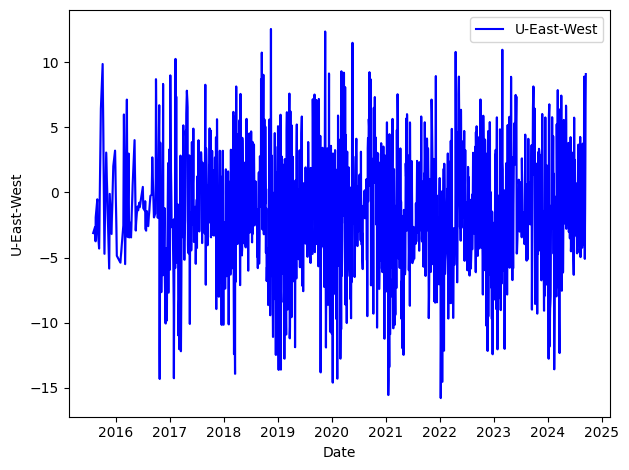

In [19]:
# df_cluster_0 = df_cluster_0.sort_values(by='Date')

sns.lineplot(x='Date', y='U-East-West', data=df, label='U-East-West', color='b')
plt.tight_layout()

# Display all plots
plt.show()

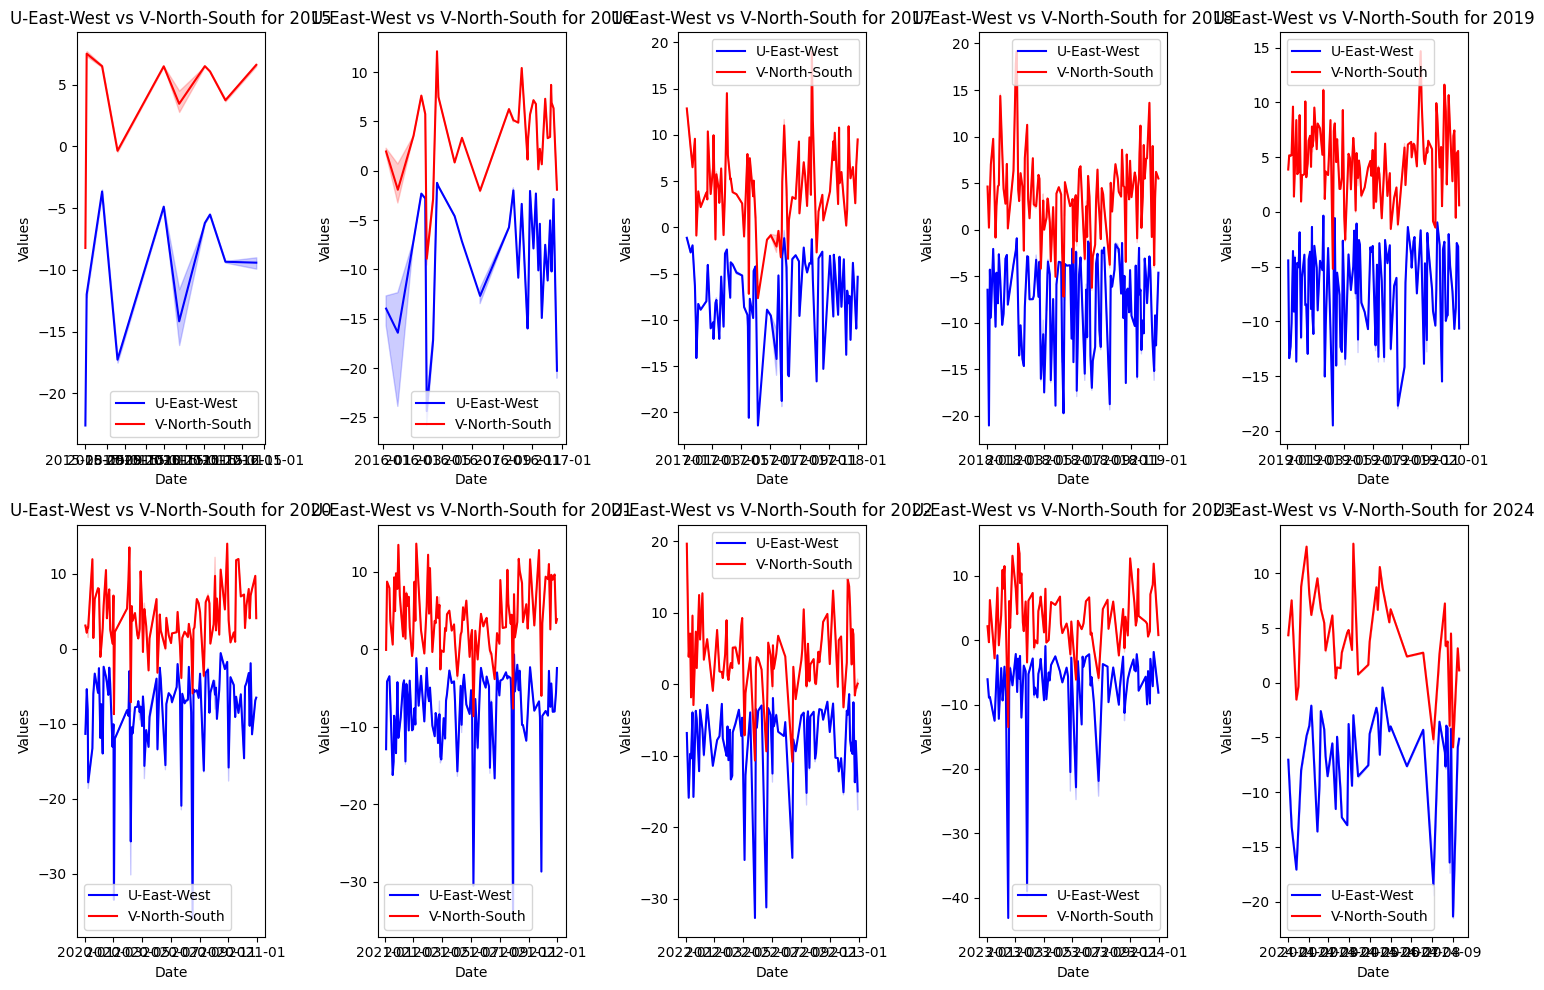

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique years from the 'Date' column
years = df_cluster_0['Date'].dt.year.unique()

# Set up the figure with a grid of subplots (adjust rows and columns as needed)
n_rows = 2  # Example: 2 rows
n_cols = (len(years) + 1) // 2  # Adjust columns based on the number of years

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the axes array to make iteration easier
axes = axes.flatten()

# Loop over each year and plot on the corresponding subplot
for i, year in enumerate(years):
    # Filter the data for the current year
    df_year = df_cluster_0[df_cluster_0['Date'].dt.year == year]

    # Plot 'U-East-West' and 'V-North-South' for the current year
    sns.lineplot(x='Date', y='U-East-West', data=df_year, label='U-East-West', color='b', ax=axes[i])
    sns.lineplot(x='Date', y='V-North-South', data=df_year, label='V-North-South', color='r', ax=axes[i])

    # Customize each subplot
    axes[i].set_title(f'U-East-West vs V-North-South for {year}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Values')
    axes[i].legend()

# Adjust the layout to avoid overlap
plt.tight_layout()

# Display all plots
plt.show()


In [22]:
import pandas as pd
df['YearMonth'] = pd.to_datetime(df['Date']).dt.strftime('%Y-%m')

In [23]:
df

Date      Speed   Direction  Cos(dir)  Sen(dir)        Lat  \
0         2019-04-20   9.112082  191.507050 -0.979900 -0.199488  35.735710   
1         2019-04-20   8.611857  191.513458 -0.979878 -0.199598  35.737404   
2         2019-04-20   8.684312  191.519867 -0.979855 -0.199708  35.739094   
3         2019-04-20   8.623184  191.526260 -0.979833 -0.199817  35.740788   
4         2019-04-20   8.722241  191.532669 -0.979811 -0.199927  35.742477   
...              ...        ...         ...       ...       ...        ...   
223109361 2021-01-29  16.900000  321.281860  0.780232 -0.625490  38.554832   
223109362 2021-01-29  16.299999  324.274872  0.811827 -0.583897  38.556259   
223109363 2021-01-29  16.100000  323.267883  0.801440 -0.598074  38.557686   
223109364 2021-01-29  16.400000  322.260895  0.790806 -0.612067  38.559109   
223109365 2021-01-29  17.700001  320.253906  0.768885 -0.639387  38.560532   

                 Lon                                                 ID  \
0         -74.001427  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   
1         -73.990570  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   
2         -73.979713  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   
3         -73.968857  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   
4         -73.957993  S1A_IW_OCN__2SDH_20190420T224949_20190420T2250...   
...              ...                                                ...   
223109361 -70.874741  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   
223109362 -70.886063  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   
223109363 -70.897392  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   
223109364 -70.908722  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   
223109365 -70.920052  S1B_IW_OCN__2SDV_20210129T104109_20210129T1041...   

          Start Time  End Time  U-East-West  V-North-South              x  \
0           22:49:49  22:50:14    -1.817755      -8.928930 -237611.571366   
1           22:49:49  22:50:14    -1.718909      -8.438569 -236625.873432   
2           22:49:49  22:50:14    -1.734324      -8.509371 -235640.228878   
3           22:49:49  22:50:14    -1.723060      -8.449283 -234654.613501   
4           22:49:49  22:50:14    -1.743809      -8.546147 -233668.362582   
...              ...       ...          ...            ...            ...   
223109361   10:41:09  10:41:34   -10.570777      13.185926   43102.933383   
223109362   10:41:09  10:41:34    -9.517527      13.232787   42118.083871   
223109363   10:41:09  10:41:34    -9.629000      12.903192   41132.609846   
223109364   10:41:09  10:41:34   -10.037897      12.969217   40147.176541   
223109365   10:41:09  10:41:34   -11.317142      13.609273   39161.781729   

                       y  Speed_rolling  Cluster YearMonth  
0         -341831.927671       9.112082        2   2019-04  
1         -341672.564783       8.861969        2   2019-04  
2         -341513.506687       8.802750        2   2019-04  
3         -341353.908445       8.757859        2   2019-04  
4         -341194.634552       8.750735        2   2019-04  
...                  ...            ...      ...       ...  
223109361  -33015.646602      16.340000        0   2021-01  
223109362  -32863.024808      16.490000        0   2021-01  
223109363  -32710.284125      16.640000        0   2021-01  
223109364  -32557.843176      16.810000        0   2021-01  
223109365  -32405.279749      17.030000        0   2021-01  

[223109366 rows x 17 columns]